### Acceso a una dll (.so en Linux) desde Python

Tan sólo necesitamos especificar el tipo de los argumentos y del resultado del método, o los métodos, que se vayan a utilizar.<br>
En el caso del método calcula, acepta variables C++ de tipo int, char* y bool, que son convenientemente definidas con los correspondientes tipos de *ctypes*.<br>
Esta función devuelve un array de punteros a char*, con varias imágenes codificadas en base64:

In [11]:
import os
if os.name == 'nt':
    dllname="D:\OneDrive - Universidad de Málaga\proyectos\cudaMol\cmake-build-release-visual-studio-22\Release\mol2image.dll"
    #dllname="D:\OneDrive - Universidad de Málaga\proyectos\cudaMol\cmake-build-debug-visual-studio\Debug\mol2image.dll"
    molname="d:/datos/molecules/drugbank_full/DB00114.mol2"
    molname="DB00114"
else:
    dllname="/users/felipe/clion/cudaMol/cmake-build-release-remote-host-aloe/libmol2image.so"
    molname="/users/felipe/datos/molecules/drugbank_full/DB00114.mol2"
molname

'DB00114'

In [12]:
import ctypes as c
dll= c.CDLL(dllname)
dllh=dll._handle # para poder liberarlo de la memoria. Ver en la última celda.
dll.calcula.argtypes=[c.c_int,c.c_char_p,c.c_ulong, c.c_bool, c.c_bool]
#dll.calcula.argtypes=[c.c_int]
dll.calcula.restype=c.POINTER(c.c_char_p)
dll.libera.argtypes=[c.c_int,c.POINTER(c.c_char_p)]


### Acceso a variables y funciones dentro de la dll

Se muestran dos simples ejemplos:
* Acceso a un dato de tipo int
* Acceso al método *calcula*

In [13]:
print(c.c_int.in_dll(dll, 'prueba').value) # acceso a variable interna prueba de la dll
cnt = 6

23


In [14]:
b=dll.calcula(cnt,molname.encode('utf-8'),0,False,True)
a=b

In [15]:
a[0]

b'10iVBORw0KGgoAAAANSUhEUgAAAIAAAACABAMAAAAxEHz4AAAAMFBMVEUAAADIyMj///+qqqoAAP//AAD/AP///wD//wBAQEAAAICAAACAAICAgACAgABkZGSkV1FDAAACM0lEQVR4Ae2VPY7bMBCFSWwXLSCyVgBifYIEe4AE2FRpUrFyv41TbJNKlzGQTtU2ajKNG1cyEKT3IWT4AhEd/VCWZIkzQJgAnMoyxE+Pb4aPLFSoUH+3YkUE8AfvCphvgKAtB3glrY+gAJqAXNMkgNbr/x2Q6w3JhKoLGyD1ATbe+5D6Btyn33T6QgEUSZIeKIBDkrw0AEw43R+en782AEw8tgATDAqr4CiqkQSQOA9McVkdigLXzWO1fsdYgR6HtxWAMtFNqKMBghCOsQLYNQ+mC87qfwEU7RPigoh/UrOkoEaBfwDqXjuV3W9M69hKWA/ft+474JYC9vQOsXFbwZlJEsAcJCltVxwBYuiKE6A+ya4K+KgbXgAct57FH2gC2N2jJAkwCqSU7FxiAX+US9QU28rvSpIAX1PwJssECZBlP7Y0wKfP25HN/AOAxQc6y7IOYJmwOFKqLrAxgEOkiNHfDg3hYwAXO+1329MgkICnj4h+2i+fS3mJFreBuAp1KYVjsgys547JMrTeMVna17HB0ArGBkNzoVvWO7fx0jyBBNSZrr5MHZClmf5o/wvwOrMuVvV6cX0/mooKgLkPv7/lPOz1nIRYyRvOg9bruT1UvolJ55cBGO85jwD0ne8B8lkPhs7b24lgtgu1DVPDA4sE9AHRwo/axXv7XvrVCd8i0GtnCSulOkCutTPgdHqgAdojZQB7DIDqgV0C0wXLDdwcdLUSFPVGQUkEhAoVKlQoD/UblavHUhCRB14AAAAASUVORK5CYII='

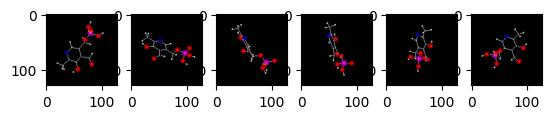

In [16]:
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

l=list()
for i in range(cnt):
    l.append(Image.open(BytesIO(base64.b64decode(a[i][2:]))))
    plt.subplot(1,cnt,i+1)
    plt.imshow(l[i])

In [9]:
# Usa esta celda para liberar la dll y poder volverla a compilar
dll= c.CDLL(dllname)
dllh=dll._handle # para poder liberarlo de la memoria. Ver en la última celda.


from ctypes import wintypes
kernel32 = c.WinDLL('kernel32', use_last_error=True)    
kernel32.FreeLibrary.argtypes = [wintypes.HMODULE]
while kernel32.FreeLibrary(dllh) != 0:
    pass